In [1]:
#Índice

#1. ¿Existe una relación entre la apertura utilizada y la cantidad de partidas ganadas por el jugador blanco?
#2. ¿Cómo influye el rango de rating en el número de turnos promedio de las partidas?
#3. ¿El tiempo de incremento ("increment code") afecta el tipo de victoria (mate, resign, etc.)?
#4. ¿Las partidas con más turnos tienden a terminar en tablas?
#5. ¿Hay aperturas específicas que tienden a generar partidas más largas?
#6. ¿Cómo cambia la frecuencia de un tipo de victoria (mate, resign, etc.) según el nivel de rating de los jugadores?
#7. ¿Qué tan frecuente es que el jugador con menor rating gane una partida?
#8. ¿Qué tan común es que una partida termine en tablas según la apertura utilizada?
#9. ¿Qué jugador (blanco o negro) suele beneficiarse más de incrementos grandes de tiempo?
#10. ¿Los jugadores con un rating alto tienden a usar ciertas aperturas más que los de un rating bajo?

Top 10 aperturas con más victorias del jugador blanco:
opening_name
Scandinavian Defense: Mieses-Kotroc Variation    164
Sicilian Defense                                 149
Scotch Game                                      145
French Defense: Knight Variation                 135
Philidor Defense #3                              127
Van't Kruijs Opening                             126
Sicilian Defense: Bowdler Attack                 119
Queen's Pawn Game: Mason Attack                  116
Queen's Pawn Game: Chigorin Variation            112
Horwitz Defense                                  110
Name: count, dtype: int64


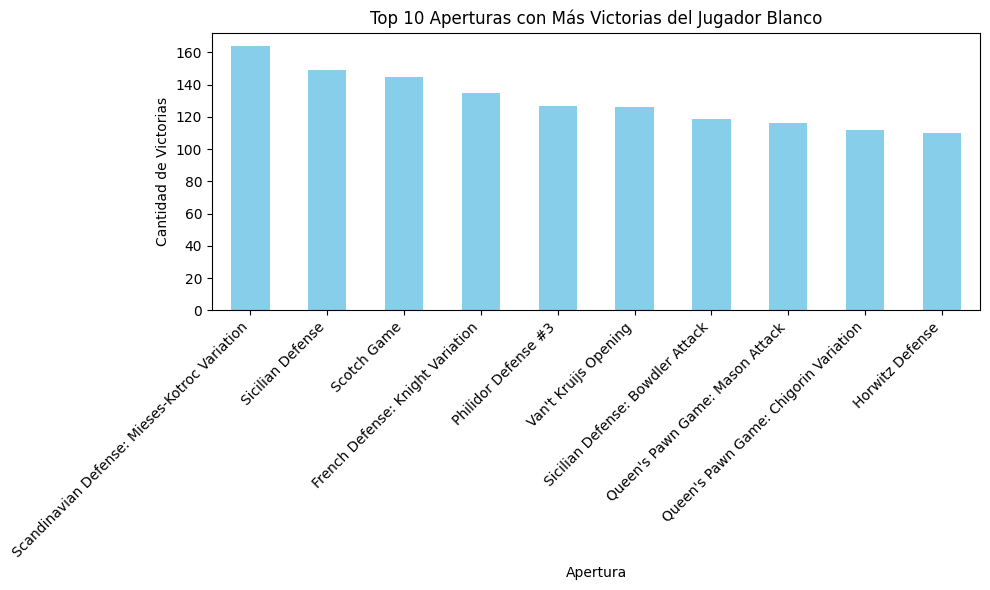

In [2]:
#1. ¿Existe una relación entre la apertura utilizada y la cantidad de partidas ganadas por el jugador blanco?

import pandas as pd
import matplotlib.pyplot as plt

# Cargar los datos
data_path = r'C:\Users\Juan Diego\Downloads\games.csv'  # Ruta al archivo CSV
df = pd.read_csv(data_path)

# Filtrar partidas ganadas por el jugador blanco
white_wins = df[df['winner'] == 'white']

# Contar las victorias por apertura
white_opening_wins = white_wins['opening_name'].value_counts()

# Obtener las 10 aperturas con más victorias
top_openings = white_opening_wins.head(10)

# Mostrar las aperturas y la cantidad de victorias en texto
print("Top 10 aperturas con más victorias del jugador blanco:")
print(top_openings)

# Crear gráfico de barras
plt.figure(figsize=(10, 6))
top_openings.plot(kind='bar', color='skyblue')
plt.title('Top 10 Aperturas con Más Victorias del Jugador Blanco')
plt.xlabel('Apertura')
plt.ylabel('Cantidad de Victorias')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Mostrar el gráfico
plt.show()

Promedio de turnos por rango de rating:
rating_range
800-1200     49.996578
1200-1400    53.806636
1400-1600    59.265249
1600-1800    63.285256
1800-2000    67.016178
2000-2200    66.095277
2200-2500    76.952030
Name: turns, dtype: float64


C:\Users\Juan Diego\AppData\Local\Temp\ipykernel_18156\2601885477.py:25: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  turns_by_rating = df.groupby('rating_range')['turns'].mean()


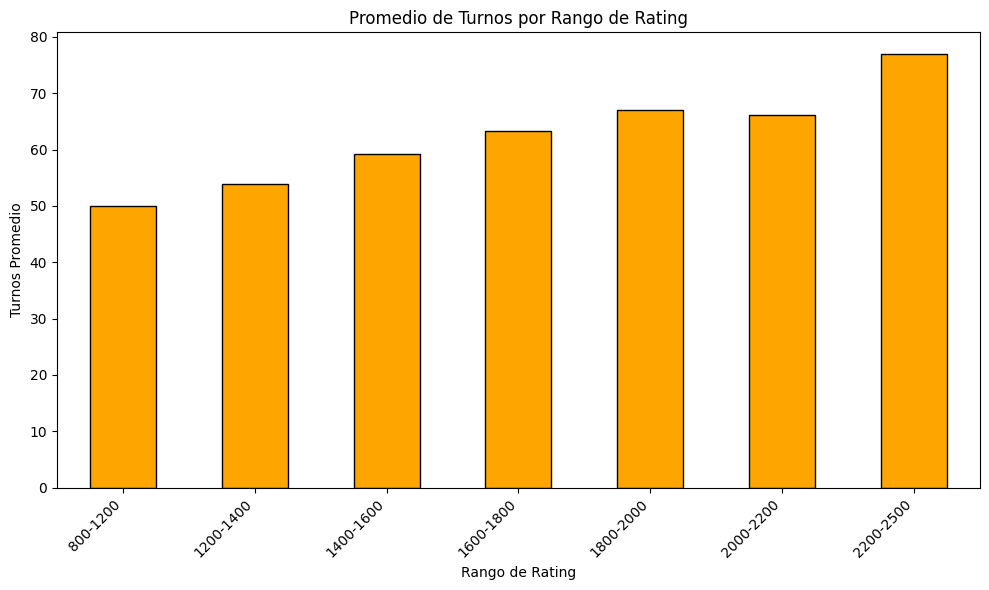

In [3]:
#2. ¿Cómo influye el rango de rating en el número de turnos promedio de las partidas?

import pandas as pd
import matplotlib.pyplot as plt

# Cargar los datos
data_path = r'C:\Users\Juan Diego\Downloads\games.csv'  # Ruta al archivo CSV
df = pd.read_csv(data_path)

# Pedimos las columnas requeridas
required_columns = ['white_rating', 'black_rating', 'turns']

# Crear una nueva columna para el promedio de rating entre los jugadores
df['average_rating'] = (df['white_rating'] + df['black_rating']) / 2

# Definir los rangos de rating
bins = [800, 1200, 1400, 1600, 1800, 2000, 2200, 2500]
labels = ['800-1200', '1200-1400', '1400-1600', '1600-1800', '1800-2000', '2000-2200', '2200-2500']
#pd.cut() clasifica los valores en average_rating dentro de los rangos definidos en bins.
#right=False indica que el límite superior de cada rango no está incluido en el rango.
df['rating_range'] = pd.cut(df['average_rating'], bins=bins, labels=labels, right=False)

# Calcular el número de turnos promedio por rango de rating
#df.groupby('rating_range') agrupa las partidas por los valores de la columna rating_range.
turns_by_rating = df.groupby('rating_range')['turns'].mean()

# Mostrar los resultados en texto
print("Promedio de turnos por rango de rating:")
print(turns_by_rating)

# Crear un gráfico de barras para visualizar los resultados
plt.figure(figsize=(10, 6))
turns_by_rating.plot(kind='bar', color='orange', edgecolor='black')
plt.title('Promedio de Turnos por Rango de Rating')
plt.xlabel('Rango de Rating')
plt.ylabel('Turnos Promedio')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Mostrar el gráfico
plt.show()


Resultados del test de chi-cuadrado:
Chi-cuadrado: 1935.0632425469105
Grados de libertad: 1197
Valor p: 9.967522047079905e-38

Conclusión: Hay evidencia estadística significativa de que el tiempo de incremento afecta el tipo de victoria (95% de confianza).


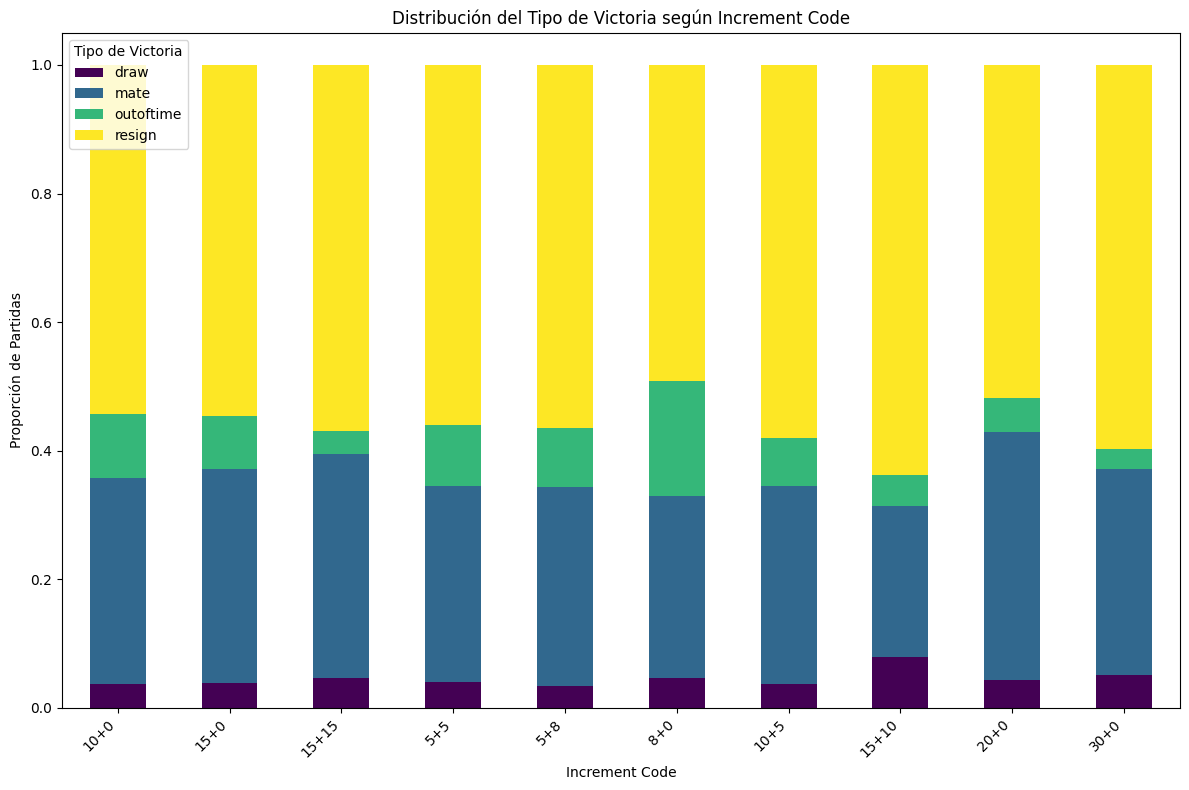

In [4]:
#3. ¿El tiempo de incremento ("increment code") afecta el tipo de victoria (mate, resign, etc.)?

import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# Cargar los datos
data_path = r'C:\Users\Juan Diego\Downloads\games.csv'  # Ruta al archivo CSV
df = pd.read_csv(data_path)

# Crear tabla de contingencia entre tiempo de incremento y tipo de victoria
contingency_table = pd.crosstab(df['increment_code'], df['victory_status'])

# Realizar el test de chi-cuadrado
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Mostrar resultados del test de chi-cuadrado
print("Resultados del test de chi-cuadrado:")
print("Chi-cuadrado:", chi2)
print("Grados de libertad:", dof)
print("Valor p:", p)
print()

# Evaluar resultados
if p < 0.05:
    conclusion = "Conclusión: Hay evidencia estadística significativa de que el tiempo de incremento afecta el tipo de victoria (95% de confianza)."
else:
    conclusion = "Conclusión: No hay evidencia estadística suficiente para afirmar que el tiempo de incremento afecta el tipo de victoria (95% de confianza)."
print(conclusion)

# Visualización: Distribución de tipos de victoria por tiempo de incremento
# Seleccionar los tiempos de incremento más comunes
top_increments = contingency_table.sum(axis=1).sort_values(ascending=False).head(10).index
filtered_table = contingency_table.loc[top_increments]

# Normalizar los datos para ver proporciones
filtered_table_normalized = filtered_table.div(filtered_table.sum(axis=1), axis=0)

# Crear gráfico de barras apiladas
filtered_table_normalized.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='viridis')
plt.title('Distribución del Tipo de Victoria según Increment Code')
plt.xlabel('Increment Code')
plt.ylabel('Proporción de Partidas')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Tipo de Victoria', loc='upper left')
plt.tight_layout()

# Mostrar el gráfico
plt.show()

Promedio de turnos en partidas que terminaron en tablas: 83.78
Promedio de turnos en partidas que NO terminaron en tablas: 59.36

Resultados del test t de Student:
T-statistic: 16.0247
Valor p: 0.0000
Conclusión: Hay una diferencia estadísticamente significativa en el número de turnos entre partidas que terminan en tablas y las que no (95% de confianza).


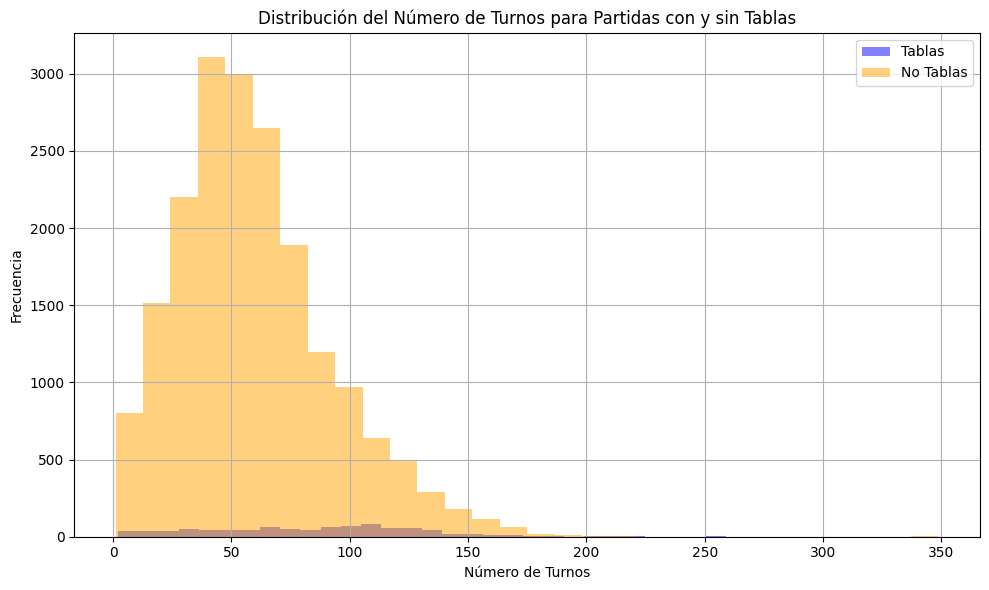

In [5]:
#4. ¿Las partidas con más turnos tienden a terminar en tablas?

import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

# Cargar los datos
data_path = r'C:\Users\Juan Diego\Downloads\games.csv'  # Ruta al archivo CSV
df = pd.read_csv(data_path)

# Crear un indicador para partidas que terminaron en tablas
df['is_draw'] = df['victory_status'] == 'draw'

# Calcular el promedio de turnos para partidas con y sin tablas
average_turns_draw = df[df['is_draw']]['turns'].mean()
average_turns_no_draw = df[~df['is_draw']]['turns'].mean()

# Imprimir los promedios
print(f"Promedio de turnos en partidas que terminaron en tablas: {average_turns_draw:.2f}")
print(f"Promedio de turnos en partidas que NO terminaron en tablas: {average_turns_no_draw:.2f}")

# Realizar test t de Student
turns_draw = df[df['is_draw']]['turns']
turns_no_draw = df[~df['is_draw']]['turns']
t_stat, p_value = ttest_ind(turns_draw, turns_no_draw, equal_var=False)

# Mostrar resultados del test t
print("\nResultados del test t de Student:")
print(f"T-statistic: {t_stat:.4f}")
print(f"Valor p: {p_value:.4f}")

if p_value < 0.05:
    conclusion = "Conclusión: Hay una diferencia estadísticamente significativa en el número de turnos entre partidas que terminan en tablas y las que no (95% de confianza)."
else:
    conclusion = "Conclusión: No hay evidencia suficiente para afirmar que el número de turnos difiere significativamente entre partidas que terminan en tablas y las que no (95% de confianza)."
print(conclusion)

# Visualización: Distribución del número de turnos para partidas con y sin tablas
plt.figure(figsize=(10, 6))
df[df['is_draw']]['turns'].hist(alpha=0.5, bins=30, label='Tablas', color='blue')
df[~df['is_draw']]['turns'].hist(alpha=0.5, bins=30, label='No Tablas', color='orange')
plt.title('Distribución del Número de Turnos para Partidas con y sin Tablas')
plt.xlabel('Número de Turnos')
plt.ylabel('Frecuencia')
plt.legend()
plt.tight_layout()

# Mostrar el gráfico
plt.show()

Top 10 aperturas que generan partidas más largas (promedio de turnos):
opening_name
Queen's Gambit Declined: Hastings Variation                                           349.0
Queen's Gambit Declined: Pseudo-Tarrasch Variation                                    208.0
Neo-Gruenfeld Defense                                                                 204.0
Slav Defense: Two Knights Attack                                                      171.0
Queen's Gambit Accepted: Central Variation |  Rubinstein Defense |  Yefimov Gambit    170.0
Ruy Lopez: Classical Variation |  Modern Main Line                                    168.0
French Defense: MacCutcheon Variation |  Exchange Variation                           166.0
Semi-Slav Defense: Marshall Gambit |  Main Line                                       164.0
Ruy Lopez: Morphy Defense |  Breyer Defense |  Quiet Variation                        156.0
Benoni Defense: Classical Variation |  Averbakh-Grivas Attack                         15

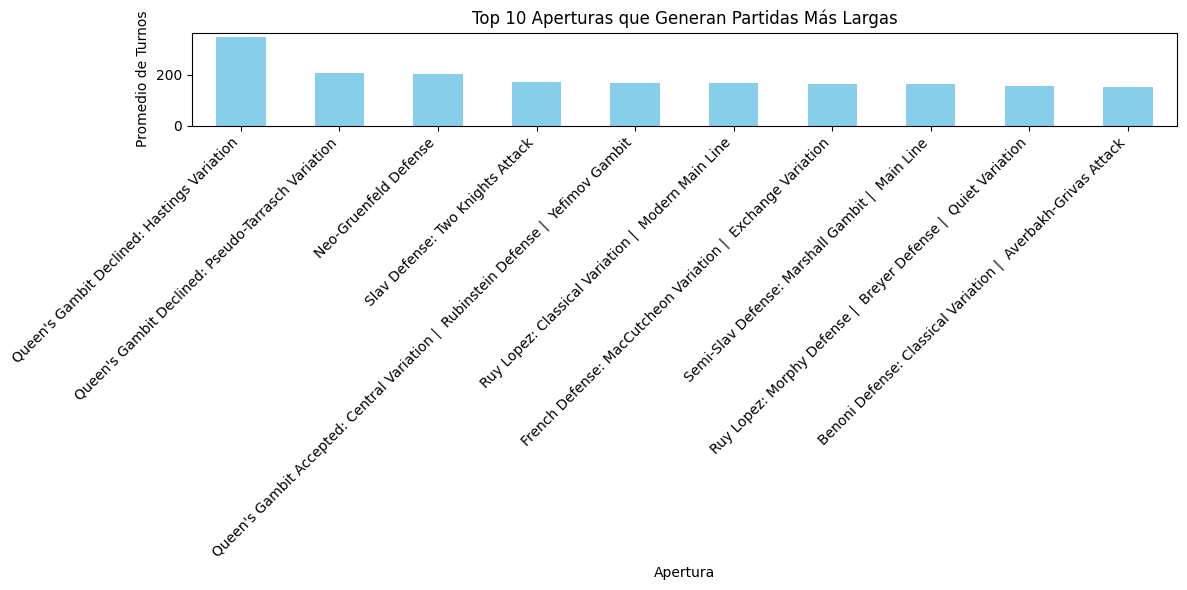

In [6]:
#5. ¿Hay aperturas específicas que tienden a generar partidas más largas?

import pandas as pd
import matplotlib.pyplot as plt

# Cargar los datos
data_path = r'C:\Users\Juan Diego\Downloads\games.csv'  # Ruta al archivo CSV
df = pd.read_csv(data_path)

# Calcular el promedio de turnos por apertura
average_turns_by_opening = df.groupby('opening_name')['turns'].mean().sort_values(ascending=False)

# Seleccionar las 10 aperturas con el promedio de turnos más alto
top_longest_openings = average_turns_by_opening.head(10)

# Mostrar resultados en consola
print("Top 10 aperturas que generan partidas más largas (promedio de turnos):")
print(top_longest_openings)

# Visualizar en un gráfico de barras
plt.figure(figsize=(12, 6))
top_longest_openings.plot(kind='bar', color='skyblue')
plt.title('Top 10 Aperturas que Generan Partidas Más Largas')
plt.xlabel('Apertura')
plt.ylabel('Promedio de Turnos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Mostrar el gráfico
plt.show()

Distribución de tipos de victoria por rango de rating (proporciones):
victory_status      draw      mate  outoftime    resign
rating_range                                           
800-1200        0.047904  0.397776   0.098375  0.455945
1200-1400       0.034539  0.413380   0.069894  0.482187
1400-1600       0.039070  0.353610   0.075668  0.531652
1600-1800       0.045299  0.277991   0.092308  0.584402
1800-2000       0.052578  0.228514   0.090327  0.628581
2000-2200       0.068404  0.152280   0.101792  0.677524
2200-2500       0.125461  0.107011   0.088561  0.678967


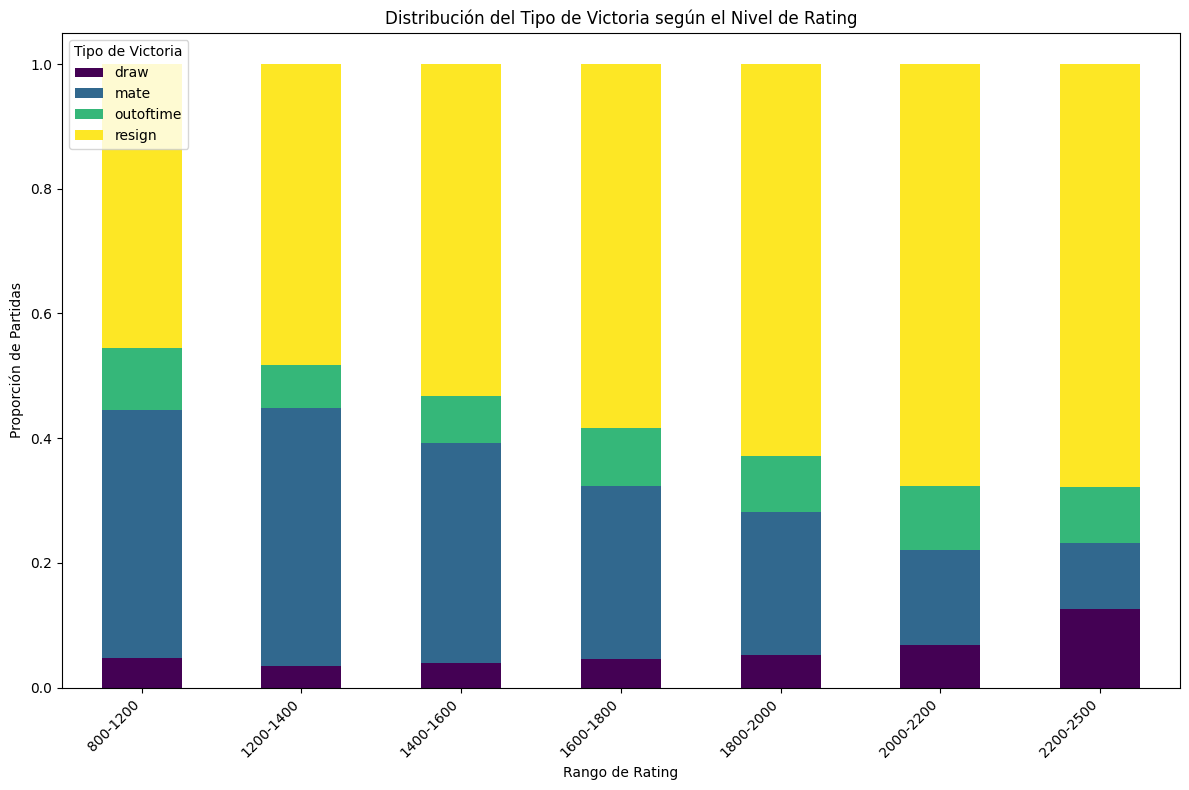

In [7]:
#6. ¿Cómo cambia la frecuencia de un tipo de victoria (mate, resign, etc.) según el nivel de rating de los jugadores?

import pandas as pd
import matplotlib.pyplot as plt

# Cargar los datos
data_path = r'C:\Users\Juan Diego\Downloads\games.csv'  # Ruta al archivo CSV
df = pd.read_csv(data_path)

# Verificar si las columnas necesarias están presentes
required_columns = ['white_rating', 'black_rating', 'victory_status']
if not all(col in df.columns for col in required_columns):
    raise ValueError(f"El archivo CSV debe contener las columnas: {', '.join(required_columns)}")

# Crear una nueva columna para el promedio de rating de los jugadores
df['average_rating'] = (df['white_rating'] + df['black_rating']) / 2

# Definir los rangos de rating
bins = [800, 1200, 1400, 1600, 1800, 2000, 2200, 2500]
labels = ['800-1200', '1200-1400', '1400-1600', '1600-1800', '1800-2000', '2000-2200', '2200-2500']
df['rating_range'] = pd.cut(df['average_rating'], bins=bins, labels=labels, right=False)

# Crear tabla de contingencia entre el rango de rating y el tipo de victoria (proporciones)
victory_by_rating = pd.crosstab(df['rating_range'], df['victory_status'], normalize='index')

# Mostrar la tabla en texto
print("Distribución de tipos de victoria por rango de rating (proporciones):")
print(victory_by_rating)

# Visualización: Gráfico de barras apiladas
victory_by_rating.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='viridis')
plt.title('Distribución del Tipo de Victoria según el Nivel de Rating')
plt.xlabel('Rango de Rating')
plt.ylabel('Proporción de Partidas')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Tipo de Victoria', loc='upper left')
plt.tight_layout()

# Mostrar el gráfico
plt.show()

Total de partidas analizadas: 20058
Partidas ganadas por el jugador con menor rating: 6661 (33.21%)
Partidas ganadas por el jugador con mayor rating: 13397 (66.79%)


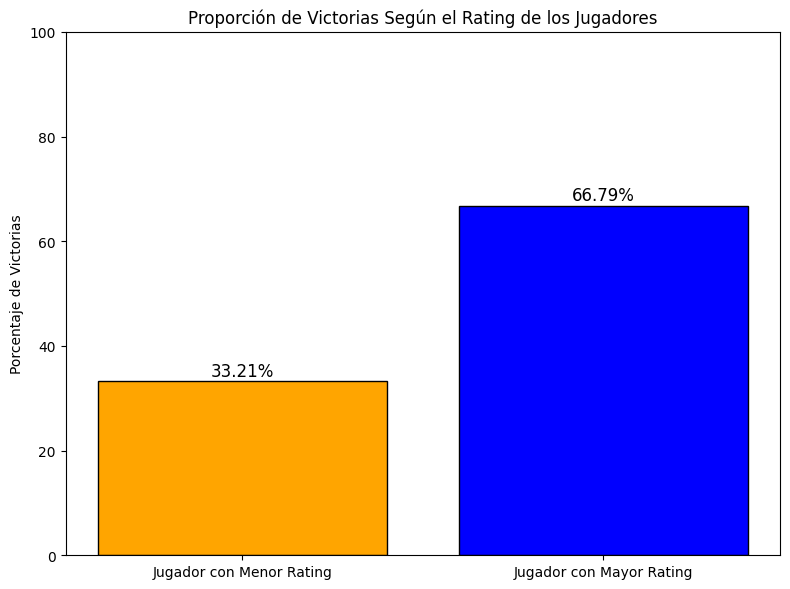

In [8]:
#7. ¿Qué tan frecuente es que el jugador con menor rating gane una partida?
import pandas as pd
import matplotlib.pyplot as plt

# Cargar los datos
data_path = r'C:\Users\Juan Diego\Downloads\games.csv'  # Ruta al archivo CSV
df = pd.read_csv(data_path)

# Verificar si las columnas necesarias están presentes
required_columns = ['white_rating', 'black_rating', 'winner']
if not all(col in df.columns for col in required_columns):
    raise ValueError(f"El archivo CSV debe contener las columnas: {', '.join(required_columns)}")

# Determinar quién tiene el menor rating en cada partida
df['lower_rated'] = df['white_rating'] < df['black_rating']
df['lower_rated_winner'] = ((df['lower_rated'] & (df['winner'] == 'white')) | 
                            (~df['lower_rated'] & (df['winner'] == 'black')))

# Calcular frecuencias
total_games = len(df)
lower_rated_wins = df['lower_rated_winner'].sum()
higher_rated_wins = total_games - lower_rated_wins
percentage_lower_rated_wins = (lower_rated_wins / total_games) * 100
percentage_higher_rated_wins = (higher_rated_wins / total_games) * 100

# Mostrar los resultados en texto
print(f"Total de partidas analizadas: {total_games}")
print(f"Partidas ganadas por el jugador con menor rating: {lower_rated_wins} ({percentage_lower_rated_wins:.2f}%)")
print(f"Partidas ganadas por el jugador con mayor rating: {higher_rated_wins} ({percentage_higher_rated_wins:.2f}%)")

# Crear datos para la gráfica
labels = ['Jugador con Menor Rating', 'Jugador con Mayor Rating']
values = [percentage_lower_rated_wins, percentage_higher_rated_wins]

# Crear gráfico de barras
plt.figure(figsize=(8, 6))
plt.bar(labels, values, color=['orange', 'blue'], edgecolor='black')
plt.title('Proporción de Victorias Según el Rating de los Jugadores')
plt.ylabel('Porcentaje de Victorias')
plt.ylim(0, 100)

# Mostrar el porcentaje encima de las barras
for i, v in enumerate(values):
    plt.text(i, v + 1, f"{v:.2f}%", ha='center', fontsize=12)

plt.tight_layout()
plt.show()


Top 10 aperturas con mayor proporción de tablas (considerando al menos 10 partidas):
opening_name
King's Indian Attack: Sicilian Variation                   0.600000
Zukertort Opening: Kingside Fianchetto                     0.291667
Zukertort Opening: Queenside Fianchetto Variation          0.277778
French Defense: Tarrasch Variation                         0.230769
Ruy Lopez: Morphy Defense |  Classical Defense Deferred    0.230769
Benoni Defense: Benoni Gambit Accepted                     0.227273
Nimzo-Indian Defense: Classical Variation                  0.214286
Semi-Slav Defense                                          0.212121
Queen's Gambit Accepted: Saduleto Variation                0.210526
Four Knights Game: Ranken Variation                        0.200000
Name: count, dtype: float64


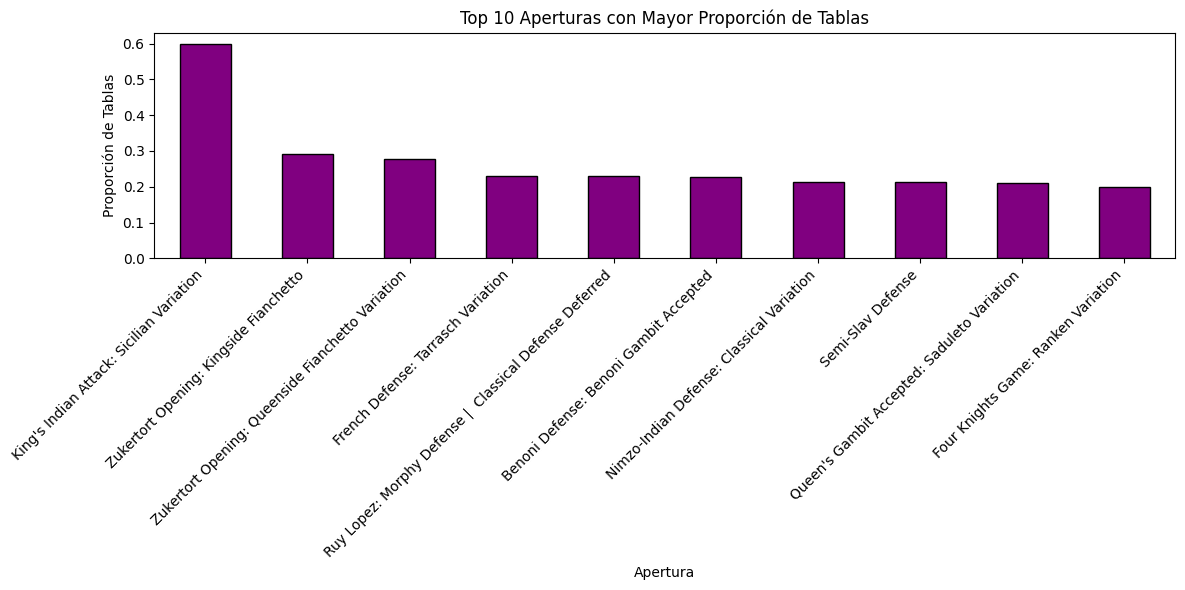

In [9]:
#8. ¿Qué tan común es que una partida termine en tablas según la apertura utilizada?

#PROBLEMA
#El problema ocurre porque hay aperturas en el conjunto de datos que aparecen muy pocas veces (posiblemente solo una vez) y, casualmente, esas partidas terminaron en tablas.
#Esto hace que su proporción sea 1.0. Este resultado no es representativo, ya que esas aperturas no tienen suficiente data para realizar un análisis confiable.

#Solución
#Podemos aplicar un filtro adicional para considerar solo aperturas que aparecen un número significativo de veces (por ejemplo, al menos 10 partidas).
#Esto ayudará a excluir resultados que no sean estadísticamente relevantes.


import pandas as pd
import matplotlib.pyplot as plt

# Cargar los datos
data_path = r'C:\Users\Juan Diego\Downloads\games.csv'  # Ruta al archivo CSV
df = pd.read_csv(data_path)

# Verificar si las columnas necesarias están presentes
required_columns = ['opening_name', 'victory_status']
if not all(col in df.columns for col in required_columns):
    raise ValueError(f"El archivo CSV debe contener las columnas: {', '.join(required_columns)}")

# Filtrar partidas que terminaron en tablas
draws = df[df['victory_status'] == 'draw']

# Calcular la proporción de tablas por apertura
opening_counts = df['opening_name'].value_counts()
draw_counts = draws['opening_name'].value_counts()
draw_proportion_by_opening = (draw_counts / opening_counts).dropna()

# Filtrar aperturas con al menos 10 partidas jugadas
significant_openings = opening_counts[opening_counts >= 10].index
filtered_draw_proportion = draw_proportion_by_opening[draw_proportion_by_opening.index.isin(significant_openings)]

# Seleccionar las 10 aperturas con mayor proporción de tablas
top_draw_openings = filtered_draw_proportion.sort_values(ascending=False).head(10)

# Mostrar los resultados en texto
print("Top 10 aperturas con mayor proporción de tablas (considerando al menos 10 partidas):")
print(top_draw_openings)

# Crear gráfico de barras
plt.figure(figsize=(12, 6))
top_draw_openings.plot(kind='bar', color='purple', edgecolor='black')
plt.title('Top 10 Aperturas con Mayor Proporción de Tablas')
plt.xlabel('Apertura')
plt.ylabel('Proporción de Tablas')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Mostrar el gráfico
plt.show()

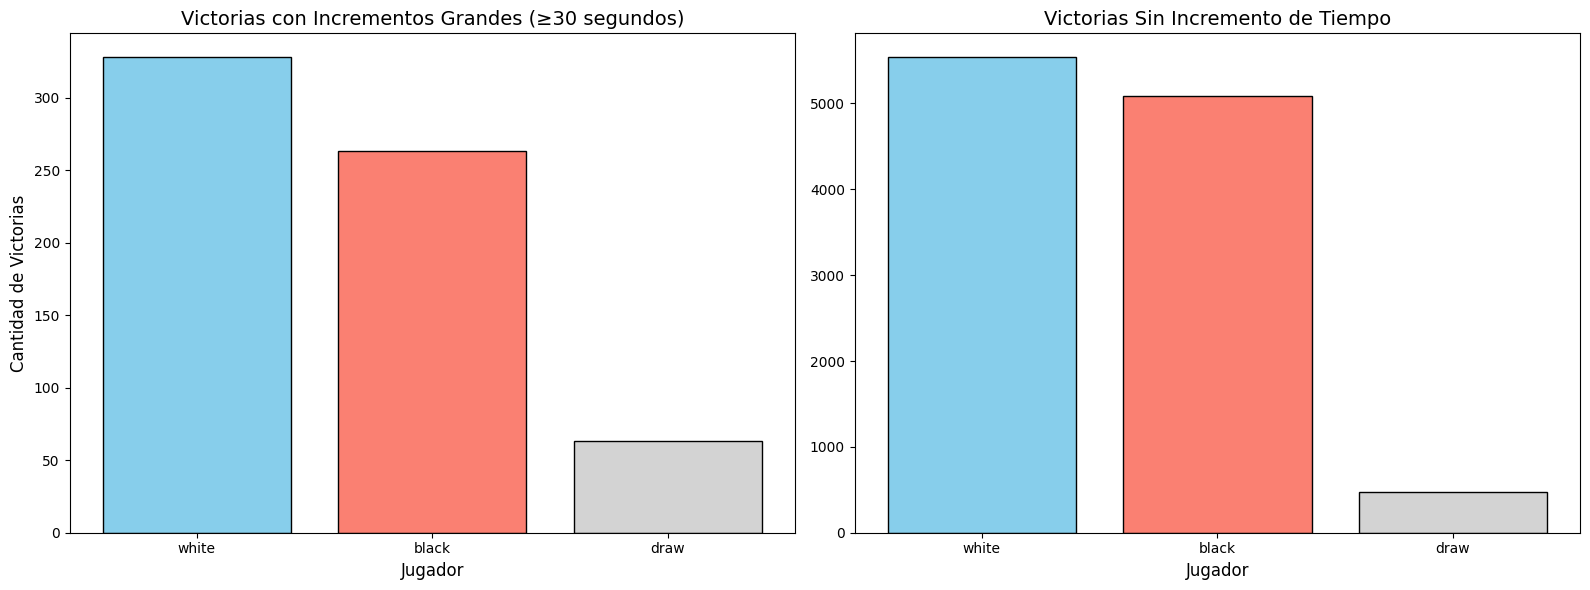

Victorias en partidas con incrementos grandes de tiempo (≥30 segundos):
winner
white    328
black    263
draw      63
Name: count, dtype: int64

Victorias en partidas sin incremento de tiempo:
winner
white    5540
black    5086
draw      472
Name: count, dtype: int64


In [10]:
#9. ¿Qué jugador (blanco o negro) suele beneficiarse más de incrementos grandes de tiempo?

import pandas as pd
import matplotlib.pyplot as plt

# Cargar los datos
data_path = r'C:\Users\Juan Diego\Downloads\games.csv'  # Ruta al archivo CSV
df = pd.read_csv(data_path)

# Verificar si las columnas necesarias están presentes
required_columns = ['increment_code', 'winner']
if not all(col in df.columns for col in required_columns):
    raise ValueError(f"El archivo CSV debe contener las columnas: {', '.join(required_columns)}")

# Extraer el valor del incremento
df['increment_value'] = df['increment_code'].str.extract(r'(\d+)$').astype(float)

# Filtrar partidas con incrementos grandes (≥30 segundos)
large_increments = df[df['increment_value'] >= 30]
victories_large_increments = large_increments['winner'].value_counts()

# Filtrar partidas sin incremento de tiempo (0 segundos)
no_increment = df[df['increment_value'] == 0]
victories_no_increment = no_increment['winner'].value_counts()

# Crear los gráficos con ejes independientes
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico 1: Incrementos grandes
axs[0].bar(victories_large_increments.index, victories_large_increments.values, 
           color=['skyblue', 'salmon', 'lightgray'], edgecolor='black')
axs[0].set_title('Victorias con Incrementos Grandes (≥30 segundos)', fontsize=14)
axs[0].set_xlabel('Jugador', fontsize=12)
axs[0].set_ylabel('Cantidad de Victorias', fontsize=12)
axs[0].tick_params(axis='x', rotation=0)

# Gráfico 2: Sin incremento
axs[1].bar(victories_no_increment.index, victories_no_increment.values, 
           color=['skyblue', 'salmon', 'lightgray'], edgecolor='black')
axs[1].set_title('Victorias Sin Incremento de Tiempo', fontsize=14)
axs[1].set_xlabel('Jugador', fontsize=12)
axs[1].tick_params(axis='x', rotation=0)

# Ajustar el diseño
plt.tight_layout()

# Mostrar los gráficos
plt.show()

# Mostrar resultados en texto
print("Victorias en partidas con incrementos grandes de tiempo (≥30 segundos):")
print(victories_large_increments)
print("\nVictorias en partidas sin incremento de tiempo:")
print(victories_no_increment)

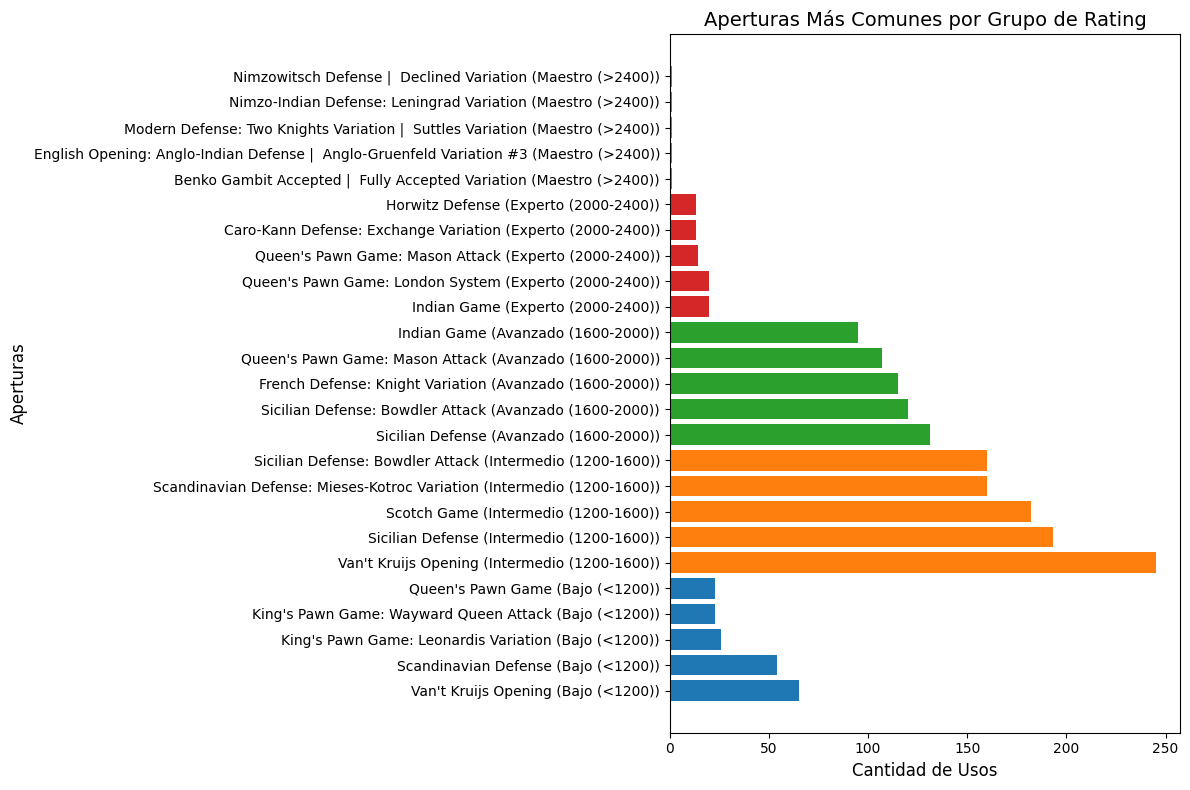

Aperturas más comunes por grupo de rating:
                rating_group  \
290             Bajo (<1200)   
251             Bajo (<1200)   
141             Bajo (<1200)   
147             Bajo (<1200)   
212             Bajo (<1200)   
1221  Intermedio (1200-1600)   
1072  Intermedio (1200-1600)   
1041  Intermedio (1200-1600)   
1035  Intermedio (1200-1600)   
1083  Intermedio (1200-1600)   
2173    Avanzado (1600-2000)   
2185    Avanzado (1600-2000)   
1519    Avanzado (1600-2000)   
2009    Avanzado (1600-2000)   
1594    Avanzado (1600-2000)   
2588     Experto (2000-2400)   
2790     Experto (2000-2400)   
2791     Experto (2000-2400)   
2448     Experto (2000-2400)   
2583     Experto (2000-2400)   
3049         Maestro (>2400)   
3050         Maestro (>2400)   
3051         Maestro (>2400)   
3052         Maestro (>2400)   
3053         Maestro (>2400)   

                                           opening_name  count  
290                                Van't Kruijs Opening    

In [11]:
#10. ¿Los jugadores con un rating alto tienden a usar ciertas aperturas más que los de un rating bajo?

import pandas as pd
import matplotlib.pyplot as plt

# Cargar los datos
data_path = r'C:\Users\Juan Diego\Downloads\games.csv'  # Ruta al archivo CSV
df = pd.read_csv(data_path)

# Verificar si las columnas necesarias están presentes
required_columns = ['white_rating', 'black_rating', 'opening_name']
if not all(col in df.columns for col in required_columns):
    raise ValueError(f"El archivo CSV debe contener las columnas: {', '.join(required_columns)}")

# Calcular el promedio de rating de cada partida
df['average_rating'] = (df['white_rating'] + df['black_rating']) / 2

# Clasificar a los jugadores en grupos de rating
df['rating_group'] = pd.cut(
    df['average_rating'],
    bins=[0, 1200, 1600, 2000, 2400, float('inf')],
    labels=['Bajo (<1200)', 'Intermedio (1200-1600)', 'Avanzado (1600-2000)', 'Experto (2000-2400)', 'Maestro (>2400)']
)

# Contar las aperturas más frecuentes por grupo de rating (con observed=True)
popular_openings_by_group = df.groupby(['rating_group', 'opening_name'], observed=True).size().reset_index(name='count')

# Seleccionar las 5 aperturas más comunes para cada grupo de rating
top_openings_by_group = popular_openings_by_group.sort_values(['rating_group', 'count'], ascending=[True, False]).groupby('rating_group', observed=True).head(5)

# Crear el gráfico
fig, ax = plt.subplots(figsize=(12, 8))
for group in top_openings_by_group['rating_group'].unique():
    group_data = top_openings_by_group[top_openings_by_group['rating_group'] == group]
    ax.barh(group_data['opening_name'] + f" ({group})", group_data['count'], label=group)

ax.set_title('Aperturas Más Comunes por Grupo de Rating', fontsize=14)
ax.set_xlabel('Cantidad de Usos', fontsize=12)
ax.set_ylabel('Aperturas', fontsize=12)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

# Mostrar resultados en texto
print("Aperturas más comunes por grupo de rating:")
print(top_openings_by_group)

print(top_openings_by_group)